Loading images from category: bacterialspot and subfolder: tomato_bacterialspot
Category: earlyblight from subfolder tomato_earlyblight is not in the list of categories.
Loading images from category: healthy and subfolder: tomato_healthy
Loading images from category: lateblight and subfolder: tomato_lateblight
Loading images from category: leafmold and subfolder: tomato_leafmold
Loading images from category: mosaicvirus and subfolder: tomato_mosaicvirus
Loading images from category: septorialeafspot and subfolder: tomato_Septorialeafspot
Loading images from category: spidermite and subfolder: tomato_spidermite
Category: targetspot from subfolder tomato_targetspot is not in the list of categories.
Loading images from category: yellowleafcurlvirus and subfolder: tomato_yellowleafcurlvirus
Contagem de imagens por classe: 
 - bacterialspot: 100
 - healthy: 100
 - lateblight: 100
 - leafmold: 100
 - mosaicvirus: 100
 - yellowleafcurlvirus: 100
 - spidermite: 100
 - septorialeafspot: 100
25/

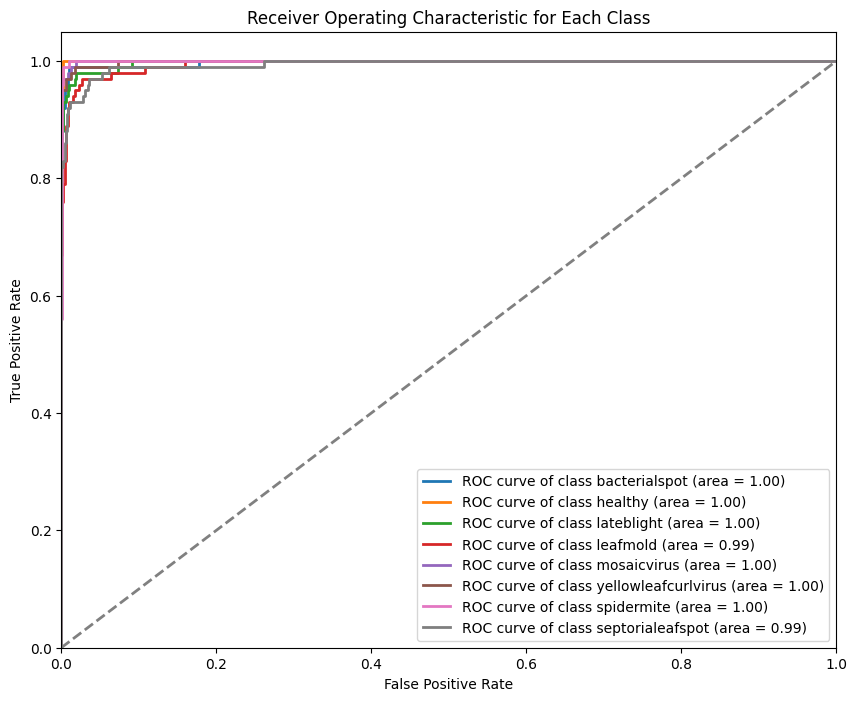

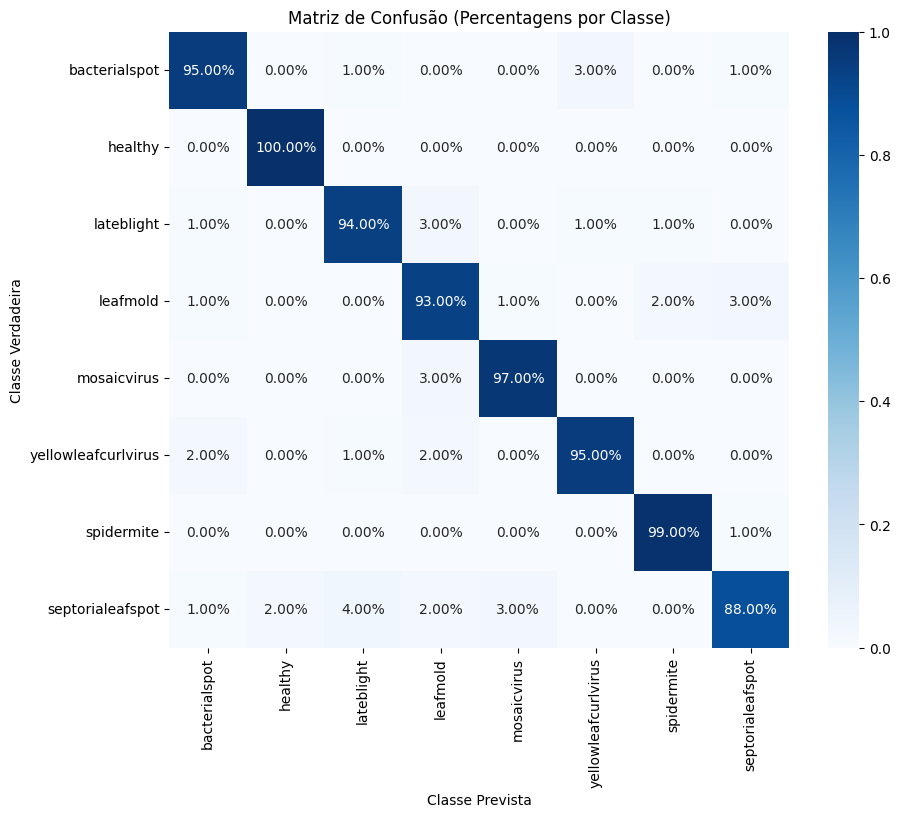

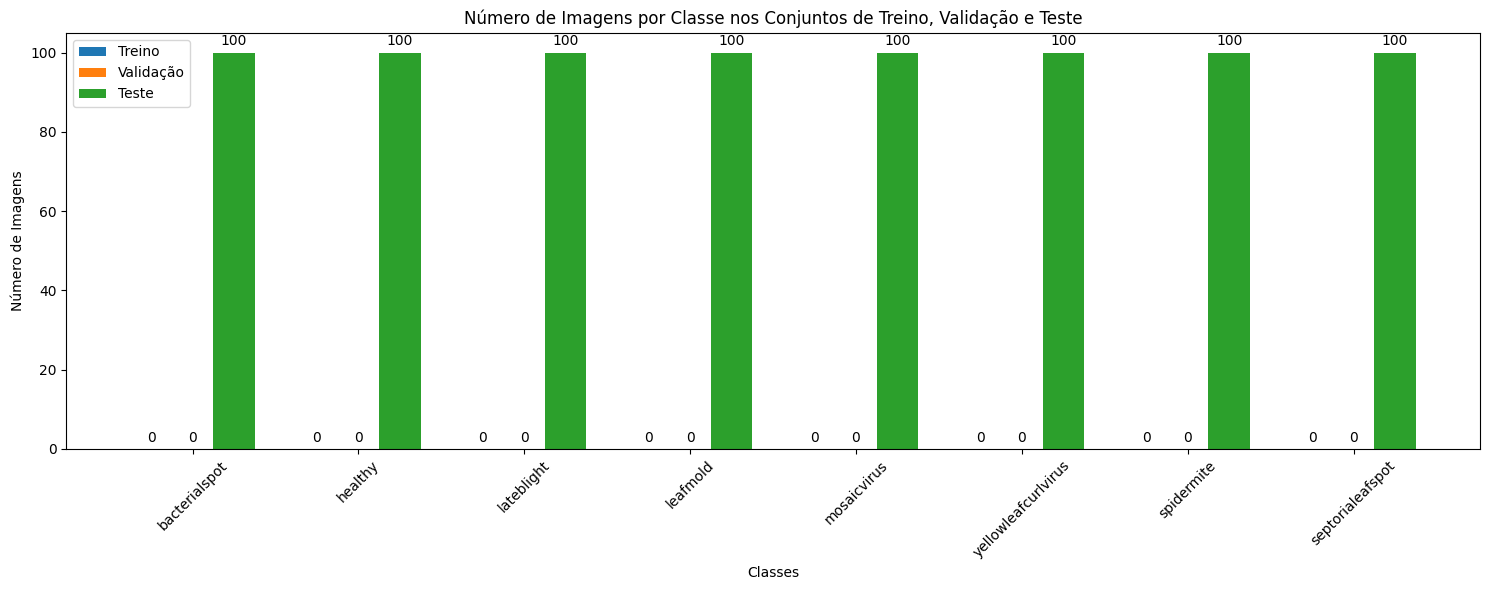

In [4]:
import os
from utils.duarte_utils import DuarteUtils
from tensorflow.keras.models import load_model
import numpy as np

model_name = "model_951_7ea2c003-fdf6-400a-898d-7dc85e268033.h5"
categories = ["bacterialspot", "healthy","lateblight","leafmold", "mosaicvirus","yellowleafcurlvirus" ,"spidermite","septorialeafspot" ]


current_dir = os.path.dirname(os.path.realpath(__file__ if '__file__' in locals() else os.getcwd()))
best_model = load_model('selected_models/' + model_name)
test_dir = os.path.join(current_dir,  "..\isec-ic\\dataset\\test")

x_test, y_test = DuarteUtils.load_images_from_folder(categories, test_dir)
DuarteUtils.display_images_data(y_test, categories)
DuarteUtils.evaluate_model(best_model, x_test, y_test)

y_pred_probs = best_model.predict(x_test)
DuarteUtils.display_roc_auc_by_class(y_test, y_pred_probs, categories)

#y_pred_probs = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
DuarteUtils.display_confusion_matrix(y_test, y_pred_classes, categories)

y_train = np.array([], dtype=int)
y_validation = np.array([], dtype=int)
DuarteUtils.display_folder_distributions(y_train, y_validation, y_test, categories)